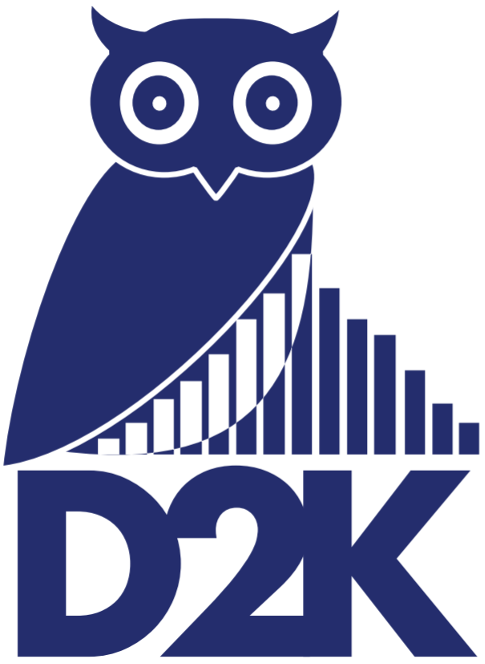 

<center>

# Welcome to COMP 680 #
### Statistics for Computing and Data Science ###

### Homework 2 ###

## Pandas basics ##
["Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language."](https://pandas.pydata.org/)

First, let's introduce the three fundamental Pandas data structures: the ``Series``, ``DataFrame``, and ``Index``.

In [ ]:
### standard imports
import numpy as np
import pandas as pd

%matplotlib inline  
import matplotlib.pyplot as plt
plt.rcParams["patch.force_edgecolor"] = True

### The Pandas Series Object

A Pandas ``Series`` is a one-dimensional array of indexed data.
It can be created from a list or array as follows:

In [ ]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

As we see in the output, the ``Series`` wraps both a sequence of values and a sequence of indices, which we can access with the ``values`` and ``index`` attributes.
The ``values`` are simply a familiar NumPy array:

In [ ]:
data.values

The ``index`` is an array-like object of type ``pd.Index``, which we'll discuss in more detail momentarily.

In [ ]:
data.index

Like with a NumPy array, data can be accessed by the associated index via the familiar Python square-bracket notation:

In [ ]:
data[1]

In [ ]:
data[1:3]

As we will see, though, the Pandas ``Series`` is much more general and flexible than the one-dimensional NumPy array that it emulates.

To construct a Pandas ``Series`` from scratch; all of them are some version of the following:

```python
>>> pd.Series(data, index=index)
```

where ``index`` is an optional argument, and ``data`` can be one of many entities.

From what we've seen so far, it may look like the ``Series`` object is basically interchangeable with a one-dimensional NumPy array. The essential difference is the presence of the index: while the Numpy Array has an *implicitly defined* integer index used to access the values, the Pandas ``Series`` has an *explicitly defined* index associated with the values. The index need not be an integer, but can consist of values of any desired type.
For example, if we wish, we can use strings as an index:

In [ ]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

And the item access works as expected:

In [ ]:
data['b']

We can even use non-contiguous or non-sequential indices:

In [ ]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=[2, 5, 3, 7])
data

In [ ]:
data[5]

### The Pandas Index Object

We have seen here that the ``Series`` object contains an explicit *index* that lets you reference and modify data. This ``Index`` object is an interesting structure in itself. As a simple example, let's construct an ``Index`` from a list of integers:

In [ ]:
ind = pd.Index([2, 3, 5, 7, 11])
ind

The ``Index`` in many ways operates like an array.
For example, we can use standard Python indexing notation to retrieve values or slices:

In [ ]:
ind[1]

In [ ]:
ind[::2]

``Index`` objects also have many of the attributes familiar from NumPy arrays:

In [ ]:
print(ind.size, ind.shape, ind.ndim, ind.dtype)

One difference between ``Index`` objects and NumPy arrays is that indices are immutable–that is, they cannot be modified via the normal means:

In [ ]:
# this returns an error
ind[1] = 0

This immutability makes it safer to share indices between multiple ``DataFrame``s and arrays, without the potential for side effects from inadvertent index modification.

### The Pandas DataFrame Object

The next fundamental structure in Pandas is the ``DataFrame``. If a ``Series`` is an analog of a one-dimensional array with flexible indices, a ``DataFrame`` is an analog of a two-dimensional array with both flexible row indices and flexible column names.
You can think of a ``DataFrame`` as data table or spreadsheet with rows and columns, or as a sequence of aligned ``Series`` objects that share the same index.

In [ ]:
state_index = pd.Index(['California','Texas','New York','Florida','Illinois'])

In [ ]:
state_area = pd.Series([423967, 695662, 141297, 170312, 149995],
                 index = state_index)
state_area

In [ ]:
state_pop = pd.Series([38332521, 26448193, 19651127, 19552860, 12882135],
                 index = state_index)
state_pop

In [ ]:
state_df = pd.DataFrame({"area": state_area, "population": state_pop})
state_df

In [ ]:
state_df.index

#### Read in Data Sources

Most of the time, you will not need to specify a dataframe by typing out all the data, instead you can read data from outside sources and save them as a datafame. 

Pandas has a number of very useful file reading tools. Most common one: pd.read_csv. 

In [ ]:
# read in a csv file saved in the same folder as your ipynb file
# if your csv file is somewhere else, need to include file path
# for example: pd.read_csv("/Users/user_name/data_folder/data_file.csv")
elections = pd.read_csv("elections.csv")
elections 

In [ ]:
# this pulls up a simple documentation of the function/method
?pd.read_csv

Read a table from a website

[padas.read_html](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html): Read HTML tables into a list of DataFrame objects.

In [ ]:
dfs = pd.read_html("https://en.wikipedia.org/wiki/Greenhouse_gas")
dfs[4]  # read the 5th table on the page, why 5th?

More in Pandas documentation: 

[padas.read_everything](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)

[padas.DataFrame.method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html)

#### Looking at only a few rows

We can use the head command to return only a few rows of a dataframe.

In [ ]:
# default return first 5 rows of your dataframe
elections.head(10)

In [ ]:
elections.head(3)

There is also a tail command.

In [ ]:
# return the last 7 rows
elections.tail(7)

`df.sample` randomly sample a subset of rows WITHOUT replacement. Here's a random sample of 5 rows. Remember what is a simple random sample?

In [ ]:
# Note I am seeding the sample so you can reproduce my results
# My favorite random seed is 7
elec_sample = elections.sample(5, random_state=7) 
elec_sample

Sampling with replacement

In [ ]:
# if I don't set the random seed, you get differnt samples
# sample with replacement is also important, more on this later
elections.sample(10, replace=True) 

Sampling columns?

In [ ]:
# you can also random sample columns, but not very useful
# axis=1 means columns instead of rows, 
# 2 is how many columns I want to sample
elections.sample(2, axis=1).head() 

#### Dataframe Utility Operations

In addition to `head`, `tail`, and `sample` the are a range of useful operations.

In [ ]:
# df.columns return all column names
elections.columns

The columns have data types.

In [ ]:
# df.dtypes return data types for each column
elections.dtypes

Casting types. This changes the Year varaible from integer to float.

In [ ]:
# df.astype for casting types
elections.astype({"Year": float}).head()

You can access the rows as an array of lists

In [ ]:
# strips away column names and row index
elections.values

Shape returns the number of rows and columns.

In [ ]:
# df.shape returns number of rows and columns
elections.shape

Size describes the number of "cells" in the dataframe

In [ ]:
# df.size return total number of "cells": number of rows timws number of columns
elections.size

We can rename columns:

`df.rename(columns={"column_name_old": "column_name_new"})`

In [ ]:
# df.rename syntax need to input a dictionary 
elections.rename(columns={"%": "Percent"})
elections.head()

**Note** that the `rename` method returned a new dataframe and didn't modify the original one. This means it is not mutating. If you need to have the change in the original dataframe, you can give this new dataframe the original name, or do `inplace=True`. 

**Most operations in Pandas are not mutating.** This produces cleaner code.  If you change something it should be stored in a new appropriately named variable.  

#### Counting unique values in a series

Series also has a very useful function `.value_counts()` which allows us to compute the number of occurences of each unique value.

In [ ]:
party_counts = elections['Party'].value_counts()
party_counts

In [ ]:
# this is still a series
type(party_counts)

Note that in each case we also got back a series and these series (like all series) are maps from index to value.

In [ ]:
party_counts.index

In [ ]:
party_counts.values

In [ ]:
party_counts["Independent"]

#### Dataframe Selecting Rows and Columns

In [ ]:
# select column by column names, this returns a series
elections["Candidate"]

In [ ]:
# select multiple columns, put column names in a list [col1, col2, ...]
# this returns a dataframe
elections[["Candidate", "Party"]]

In [ ]:
# this returns a dataframe!
elections[["Candidate"]]

If you pass a single item instead of a list you get back a `Series`

In [ ]:
party = elections["Party"]
party

When accessing a single column we get back a `pd.Series` object

In [ ]:
type(party)

The series object represents a single column (or row) of data.  The `Series` object has a `index`, a `name`, and `values`.  A series can be thought of as a map.

In [ ]:
party.index

In [ ]:
party.name

In [ ]:
party.values

We can convert a Series into a DataFrame

In [ ]:
party.to_frame()

In [ ]:
# select rows by row index
elections[:5]

In [ ]:
elections[4:10]

In [ ]:
elections[20:]

In [ ]:
# Select the row and column at the same time.
elections[["Candidate"]][:3]

In [ ]:
# the same functionality
elections[:3][["Candidate"]]

In [ ]:
# subset by Boolean, filtering!
elec_dem = elections[elections["Party"] == "Democratic"]
elec_dem.head()

In [ ]:
# returns a DataFrame with Democratic winning election
elections[
    (elections["Party"] == "Democratic") & 
    (elections["Result"] == "win")]

In [ ]:
# winning with voting percentage smaller than 50%
elections[
    (elections['Result'] == 'win') & 
    (elections['%'] < 50)
]

Using the logical negation `~` operator (not).  

In [ ]:
# winning with voting percentage greater than or equal to 50%
elections[
    (elections['Result'] == 'win') & 
    ~(elections['%'] < 50)
]

The | operator is the symbol for or.

In [ ]:
# not (Dem or Rep) = (not Dem) and (not Rep)
elections[
    ~((elections['Party'] == "Democratic") | 
        (elections['Party'] == "Republican"))
]

If we have multiple conditions (say Republican or Democratic), we can use the isin operator to simplify our code.

In [ ]:
# isin here is same as Dem or Rep
elections[elections['Party'].isin(["Republican", "Democratic"])]

#### Column Assignment (Mutating)

You can modify and even add columns using the square brackets `[ ]` 

In [ ]:
elections["Year"] = elections["Year"] * -1
elections

Adding a new column by assignment:

In [ ]:
elections["Corrected Year"] = elections["Year"] * -1
elections

In [ ]:
?np.random.randn

remember what does `df.shape[0]` return?

In [ ]:
# what is elections.shape[0]?
elections["Random Numbers"] = np.random.randn(elections.shape[0])
elections

In [ ]:
# The statistics for the columns
# notice it only computes columns with numerical values
elections.mean()

In [ ]:
elec_num = elections[["%", "Random Numbers"]]
elec_num.median()

In [ ]:
elec_num.max()

In [ ]:
elec_num.min()

In [ ]:
elec_num.std()

In [ ]:
# We could also calculate the statistics for a specific colum
elections["Random Numbers"].mean()

In [ ]:
elections["Random Numbers"].var()

This is just a very brief intruduction to Pandas. For more resources:
- [10 min to Pandas](https://pandas.pydata.org/pandas-docs/version/0.15/10min.html#min)
- [Pandas cookbook](https://pandas.pydata.org/pandas-docs/version/0.15/cookbook.html#cookbook)
- [Pandas cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

Please write your code with appropriate comments and informative names. Feel free to insert more cells as you see necessary. 

**Question 1**: The file `imdb.csv` contains a table of information about the 250 highest-rated movies on IMDb.  Load it as a dataframe called `imdb`.

In [ ]:
imdb = ...
imdb

**Question 2**:
Compute the average rating of movies from the 1940s.

*Hint:* The function `np.average` or `np.mean` can compute the average of an array of numbers.

In [ ]:
forties = ...
forties

In [ ]:
average_rating_in_forties = ...
average_rating_in_forties

**Question 3**:
Create a dataframe called `ninety_nine` containing the movies that came out in the year 1999.

In [ ]:
ninety_nine = ...
ninety_nine

**Question 4**:
Using Boolean filtering to find all the movies with a rating higher than 8.5. Assign this filtered table to the name `really_highly_rated`.

In [ ]:
really_highly_rated = ...
really_highly_rated

**Question 5**:
Find the average rating for movies released before the year 2000 and the average rating for movies released in the year 2000 or after for the movies in `imdb`.

*Hint*: Think of the steps you need to do (take the average, find the ratings, find movies released in 20th/21st centuries), and try to put them in an order that makes sense.

In [ ]:
avg_rating_in_20th_century = ...
avg_rating_in_21st_century = ...
print("Average rating in 20th century:", avg_rating_in_20th_century)
print("Average rating in 21st century:", avg_rating_in_21st_century)

**Question 6**:
Here's a challenge: Find the number of movies that came out in *even* years.

*Hint:* The operator `%` computes the remainder when dividing by a number.  So `5 % 2` is 1 and `6 % 2` is 0.  A number is even if the remainder is 0 when you divide by 2.

*Hint 2:* `%` can be used on arrays, operating elementwise like `+` or `*`.  So `make_array(5, 6, 7) % 2` is `array([1, 0, 1])`.

In [ ]:
num_even_year_movies = ...
num_even_year_movies

**Question 7**:
Calculate the mean, median and standard deviation of the ratings for the 250 movies.

*Hint:* You can use numpy function `np.mean`, `np.median` and `np.std`. 

In [ ]:
rating_mean = ...
rating_median = ...
rating_sd = ...
print({"mean": rating_mean, "median": rating_median, "standard deviation": rating_sd})

**Question 8**:
Creat a random sample of 50 movies (sample without replacement).

In [ ]:
imdb_sample = ...
imdb_sample

**Question 9**:
Calculate the same statistics of the rating: mean, median and sd for the random sample. 

In [ ]:
sample_mean = ...
sample_median = ...
sample_sd = ...
print({"sample mean": sample_mean, "sample median": sample_median, "sample sd": sample_sd})

**Question 10**:
Repeat the process in Question 8 and 9 a 1000 times, and save the results in 3 lists: `sample_mean_list`, `sample_median_list` and `sample_sd_list`. Then run the following code to visualize the sampling distribution of those statistics and compare to the population values.

In [ ]:
sample_mean_list = []
sample_median_list = []
sample_sd_list = []

rep = 1000
for i in range(1000):
    imdb_sample = ...
    sample_mean = ...
    sample_median = ...
    sample_sd = ...
    sample_mean_list = np.append(sample_mean_list, sample_mean)
    sample_median_list = np.append(sample_median_list, sample_median)
    sample_sd_list = np.append(sample_sd_list, sample_sd)

In [ ]:
plt.hist(sample_mean_list, bins=20, alpha=0.4)
plt.scatter(rating_mean, 5, color='red', s=50)
plt.title("sample mean and population mean");

In [ ]:
plt.hist(sample_median_list, bins=20, alpha=0.4)
plt.scatter(rating_median, 5, color='red', s=50)
plt.title("sample median and population median");

In [ ]:
plt.hist(sample_sd_list, bins=20, alpha=0.4)
plt.scatter(rating_sd, 5, color='red', s=50)
plt.title("sample sd and population sd");

**Question 11**: 
Here are some common random variables (distributions) with their mean and variance listed. Pick one distribution and derive the mean and the variance. You can look up the PMF or PDF for these distributions! 

$$
\begin{array}{lll}
\text{Random Variable / Distribution} & \text{Mean} & \text{Variance}           \\
\hline
\text{Bernoulli}(p)          & p             & p(1-p)         \\
\text{Binomial}(n, p)        & np            & np(1-p)        \\
\text{Poisson}(\lambda)      & \lambda       & \lambda        \\
\text{Uniform}(a, b)         & (a + b) / 2   & (b - a)^2 / 12 \\
\text{Normal}(\mu, \sigma^2) & \mu           & \sigma^2       \\
\text{Exponential}(\beta)    & \beta         & \beta^2        \\
\text{Gamma}(\alpha, \beta)  & \alpha \beta  & \alpha \beta^2 \\
\text{Beta}(\alpha, \beta)   & \alpha / (\alpha + \beta) & \alpha \beta / ((\alpha + \beta)^2 (\alpha + \beta + 1)) \\
\end{array}
$$

**Solution**:

**Question 12**: If $X_1, X_2, \cdots X_n$ are IID (independent and identically distributed) from a distribution with mean $\mu$ and variance $\sigma^2$. Calculate the mean and variance for the sample mean $\bar{X}_n = \sum_{i=1}^n X_i/ n$.

**Solution**: 

**Question 13**: Let $X \sim \text{Uniform}(0, 1)$.  Let $0 < a < b < 1$.  Let

$$
Y = \begin{cases}
1 &\text{if } 0 < x < b \\
0 &\text{otherwise}
\end{cases}
$$

and let

$$
Z = \begin{cases}
1 &\text{if } a < x < 1 \\
0 &\text{otherwise}
\end{cases}
$$

- Are $Y$ and $Z$ independent?  Why or Why not?
- Find $\mathbb{P}(Y | Z)$, then use this conditional distribution to find $\mathbb{E}(Y | Z)$.  

**Solution**:

**Question 14**: Suppose we generate a random variable $X$ in the following way:
- First we flip a fair coin. 
- If the coin is heads, take $X$ to have a $\text{Uniform}(0, 1)$ distribution.  
- If the coin is tails, take $X$ to have a $\text{Uniform}(3, 4)$ distribution.

Find $\mathbb{E}(X)$: the expectation of $X$.

**Solution**:

**Question 15**: Let $Y_1, Y_2, \dots$ be independent random variables such that $\mathbb{P}(Y_i = 1) = \mathbb{P}(Y_i = -1) = 1/2$.  Let $X_n = \sum_{i=1}^n Y_i$.  Think of $Y_i = 1$ as "the stock price increased by one dollar" $Y_i = -1$ as "the stock price decreased by one dollar" and $X_n$ as the value of the stock on day $n$.

Find 
-  $\mathbb{E}(X_n)$: the expectation of $X_n$ 
- $\mathbb{V}(X_n)$: the variance of $X_n$.

**Solution**:

**Just for Fun: Simulating the Stock Market**  
Simulate $X_n$ and plot $X_n$ versus $n$ for $n = 1, 2, \dots, 1,000$.  Repeat the whole simulation several times.  

In [ ]:
# total number of days N
N = 1000
# how many times to repeat the simulation
B = 10

# the shape of Y should be (20, 1000)
Y = 2 * np.random.binomial(n=1, p=1/2, size=(B, N)) - 1

# np.cumsum can calculate X_n = sum_{i=1}^n Y_i
# the shape of X is the same of Y
# X is the observed daily price for B stocks for N days
X = np.cumsum(Y, axis=1)

In [ ]:
# define the days as a numpy array
t = np.arange(1, N + 1)

# specify the figure size 
plt.figure(figsize=(12, 8))

# 1.96 is a magic number
z = 1.96
# the following 3 lines created a shaded range to predict
# the price change of the stock: the 95% confidence interval
plt.plot(t, z * np.sqrt(t), color='red')
plt.plot(t, -z * np.sqrt(t), color='red')
plt.fill_between(t, z * np.sqrt(t), -z * np.sqrt(t), color='red', alpha=0.1)

# plot each of stock price trajectory simulated
for b in range(B):
    plt.plot(t, X[b])

plt.title("Simulated Daily Stock Prices")
plt.xlabel("Number of Days")
plt.ylabel("Price change in $")
plt.show()

Notice that each simulation price looks very different even though they were generated the same way. Also notice that the predicted price change range (red shaded area) gets wider and wider as number of days increases. What does that mean? How does the calculations of the expectation and variance explain this?

You're done with HW 2!  Be sure to...

* **Save and Checkpoint** from the File menu,
* **Close and Halt** from the File menu,
* **Rename your ipynb file**, replacing with your name,
* **Upload** your file to the course website.